In [ ]:
# Khai báo và sử dụng các thư viện sau
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import os
import numpy as np
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import SGD, RMSprop
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.utils import validation 
from sklearn import preprocessing
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train = ImageDataGenerator(rescale = 1./255, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)
train_data = '/content/drive/MyDrive/flower/flower/DATA/training_data'
validation = ImageDataGenerator(rescale=1./255)
valid_data = '/content/drive/MyDrive/flower/flower/DATA/training_data'

In [ ]:
train_dataset = train.flow_from_directory(train_data, target_size = (224,224), batch_size = 10, class_mode = 'categorical')
validation_dataset = validation.flow_from_directory(valid_data, target_size = (224,224), batch_size = 10, class_mode = 'categorical')

Found 3050 images belonging to 5 classes.
Found 3050 images belonging to 5 classes.


In [ ]:
train_dataset.class_indices

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), kernel_initializer='he_uniform', padding = 'same', activation = 'relu', input_shape=(224, 224, 3)))
model.add(Conv2D(32, (3, 3),kernel_initializer='he_uniform', padding = 'same',  activation = 'relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(32, (3, 3), kernel_initializer='he_uniform', padding = 'same', activation = 'relu', input_shape=(224, 224, 3)))
model.add(Conv2D(32, (3, 3),kernel_initializer='he_uniform', padding = 'same',  activation = 'relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), kernel_initializer='he_uniform', padding = 'same', activation = 'relu'))
model.add(Conv2D(64, (3, 3), kernel_initializer='he_uniform', padding = 'same', activation = 'relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), kernel_initializer='he_uniform', padding = 'same', activation = 'relu'))
model.add(Conv2D(128, (3, 3), kernel_initializer='he_uniform', padding = 'same', activation = 'relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(5, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 32)      9248      
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 32)       0         
 2D)                                                    

In [ ]:
opt = SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
history = model.fit(train_dataset,batch_size=32,epochs=50,verbose=1,validation_data=validation_dataset)

Epoch 1/50
305/305 [==============================] - 68s 216ms/step - loss: 0.7598 - accuracy: 0.7154 - val_loss: 0.7025 - val_accuracy: 0.7233
Epoch 2/50
305/305 [==============================] - 67s 218ms/step - loss: 0.7333 - accuracy: 0.7220 - val_loss: 0.6583 - val_accuracy: 0.7521
Epoch 3/50
305/305 [==============================] - 66s 217ms/step - loss: 0.6980 - accuracy: 0.7220 - val_loss: 0.5754 - val_accuracy: 0.7856
Epoch 4/50
305/305 [==============================] - 67s 218ms/step - loss: 0.6995 - accuracy: 0.7328 - val_loss: 0.6307 - val_accuracy: 0.7649
Epoch 5/50
305/305 [==============================] - 66s 216ms/step - loss: 0.7123 - accuracy: 0.7328 - val_loss: 0.6266 - val_accuracy: 0.7767
Epoch 6/50
305/305 [==============================] - 65s 212ms/step - loss: 0.6940 - accuracy: 0.7479 - val_loss: 0.6535 - val_accuracy: 0.7439
Epoch 7/50
305/305 [==============================] - 66s 217ms/step - loss: 0.6544 - accuracy: 0.7521 - val_loss: 0.5701 - val_ac

In [ ]:
model.save('/content/drive/MyDrive/flower/flower/DATA/training_data/AI_flower.h5')

In [ ]:
flower_model = load_model('/content/drive/MyDrive/flower/flower/DATA/training_data/AI_flower.h5')

In [ ]:
score=flower_model.evaluate(validation_dataset,verbose=1)
print('loss = ',score[0])
print('accuracy = ',score[1])

305/305 [==============================] - 19s 60ms/step - loss: 0.2018 - accuracy: 0.9315
loss =  0.2017953097820282
accuracy =  0.9314754009246826


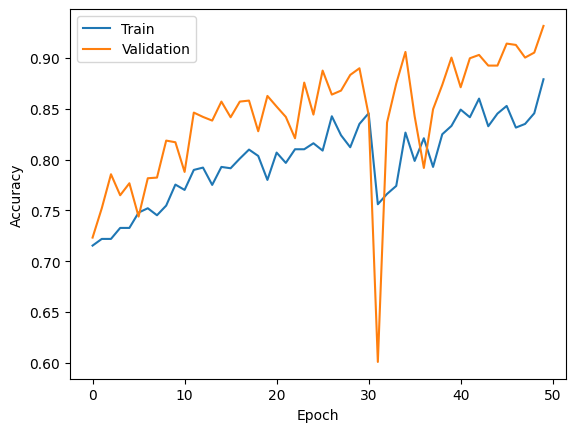

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'],loc='upper left')
plt.show()

1/1 [==============================] - 0s 31ms/step
This picture is:  dandelion


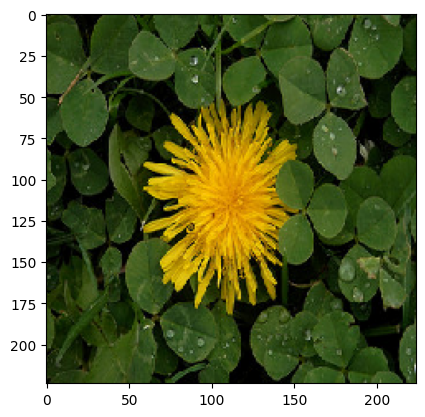

In [ ]:
image = load_img('/content/drive/MyDrive/flower/flower/DATA/training_data/dandelion/10617162044_8740d4dd9f_n.jpg',target_size=(224,224))
Label = ['daisy','dandelion','rose','sunflower','tulip']
plt.imshow(image)
image = img_to_array(image)
image = image.reshape(1,224,224,3)
image = image.astype('float32')
image = image/255
print('This picture is: ',Label[int(np.argmax(flower_model.predict(image),axis=-1))])

1/1 [==============================] - 0s 31ms/step
This picture is:  daisy


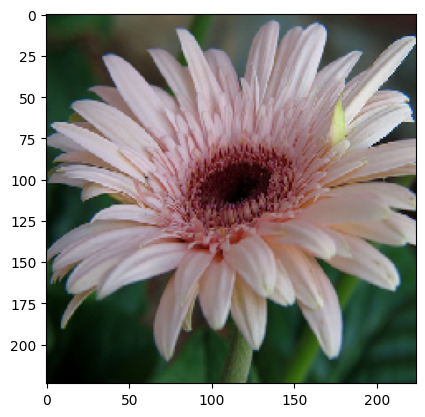

In [ ]:
image = load_img('/content/drive/MyDrive/flower/flower/DATA/training_data/daisy/1031799732_e7f4008c03.jpg',target_size=(224,224))
Label = ['daisy','dandelion','rose','sunflower','tulip']
plt.imshow(image)
image = img_to_array(image)
image = image.reshape(1,224,224,3)
image = image.astype('float32')
image = image/255
print('This picture is: ',Label[int(np.argmax(flower_model.predict(image),axis=-1))])

1/1 [==============================] - 0s 111ms/step
This picture is:  tulip


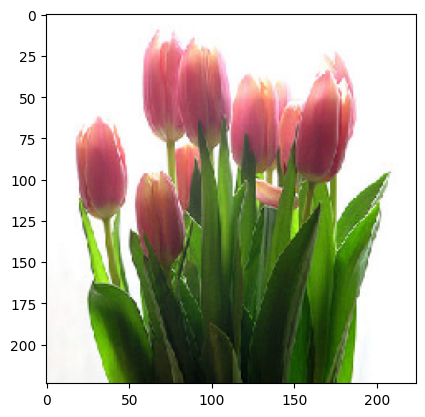

In [ ]:
image = load_img('/content/drive/MyDrive/flower/flower/DATA/training_data/tulip/112428665_d8f3632f36_n.jpg',target_size=(224,224))
Label = ['daisy','dandelion','rose','sunflower','tulip']
plt.imshow(image)
image = img_to_array(image)
image = image.reshape(1,224,224,3)
image = image.astype('float32')
image = image/255
print('This picture is: ',Label[int(np.argmax(flower_model.predict(image),axis=-1))])

1/1 [==============================] - 0s 20ms/step
This picture is:  sunflower


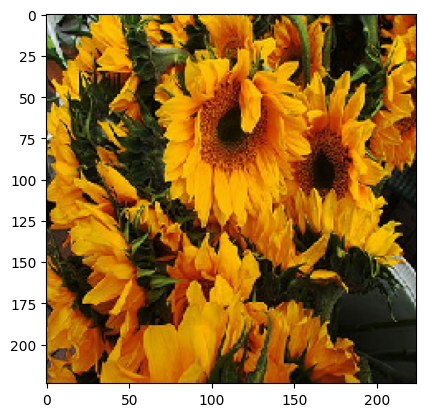

In [ ]:
image = load_img('/content/drive/MyDrive/flower/flower/DATA/training_data/sunflower/12282924083_fb80aa17d4_n.jpg',target_size=(224,224))
Label = ['daisy','dandelion','rose','sunflower','tulip']
plt.imshow(image)
image = img_to_array(image)
image = image.reshape(1,224,224,3)
image = image.astype('float32')
image = image/255
print('This picture is: ',Label[int(np.argmax(flower_model.predict(image),axis=-1))])